# Relationship between Healthcare Access versus Confirmed Cases and Deaths.


In [16]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sb.set()

In [19]:
healdata = pd.read_csv('Health_Insurance_Coverage_condensed.csv')
healdata.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County_Name,LSAD,ALAND,AWATER,GEO_PARENT_NAME,...,Total Civilian Noninstitutionalized Population under 19 yrs - No health insurance coverage *margin of error,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,Total Civilian Noninstitutionalized Population - No health insurance coverage,Total Civilian Noninstitutionalized Population - No health insurance coverage *margin of error,Shape__Area,Shape__Length,Confirmed,Deaths,Total population without healthcare access
0,1,1,161526,0500000US01001,1001,Autauga,6,1.539602e+09,25706961,Alabama,...,131,7.1,1.0,3856,561,2.052664,0.150257,932,20,3856
1,1,3,161527,0500000US01003,1003,Baldwin,6,4.117622e+09,1132980868,Alabama,...,537,8.9,0.7,18679,1449,4.278237,0.409922,2727,17,18679
2,1,5,161528,0500000US01005,1005,Barbour,6,2.292160e+09,50523213,Alabama,...,110,11.3,1.5,2544,342,2.566226,0.223253,529,4,2544
3,1,7,161529,0500000US01007,1007,Bibb,6,1.612167e+09,9602089,Alabama,...,82,10.7,2.2,2201,466,1.886955,0.156525,327,2,2201
4,1,9,161530,0500000US01009,1009,Blount,6,1.670104e+09,15015467,Alabama,...,347,10.8,1.4,6159,810,2.392512,0.164404,601,1,6159


In [20]:
healdata.describe()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,LSAD,ALAND,AWATER,POP_DENSITY,Employer Insurance only - Pop < 19,Employer Insurance only - Pop < 19 *margin of error,...,Total Civilian Noninstitutionalized Population under 19 yrs - No health insurance coverage *margin of error,Percent of Population with No Health Insurance Coverage,Percent of Population with No Health Insurance Coverage *margin of error,Total Civilian Noninstitutionalized Population - No health insurance coverage,Total Civilian Noninstitutionalized Population - No health insurance coverage *margin of error,Shape__Area,Shape__Length,Confirmed,Deaths,Total population without healthcare access
count,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000,3220.000000
mean,31.290683,102.922050,9.628897e+05,31393.605280,6.569565,2.844436e+09,2.139761e+08,112.750562,11564.554969,524.306211,...,233.813043,9.549627,1.734658,8839.888199,605.527640,2.581581,0.342835,1316.137578,45.27764,8839.888199
std,16.277207,106.693846,5.174236e+05,16292.078954,2.652226,9.256066e+09,1.220470e+09,692.745183,36062.877369,605.854098,...,293.690871,5.086483,1.404545,35466.447087,749.167229,3.558888,1.790048,6962.304363,456.31641,35466.447087
min,1.000000,1.000000,2.390100e+04,1001.000000,0.000000,5.300262e+06,0.000000e+00,0.014261,1.000000,4.000000,...,2.000000,0.000000,0.100000,0.000000,4.000000,0.126110,0.000550,0.000000,0.00000,0.000000
25%,19.000000,35.000000,4.849888e+05,19032.500000,6.000000,1.085267e+09,7.004659e+06,6.683385,944.250000,192.000000,...,72.000000,5.700000,0.900000,923.750000,212.000000,1.622240,0.114586,43.000000,0.00000,923.750000
50%,30.000000,79.000000,9.741585e+05,30024.000000,6.000000,1.565686e+09,1.930200e+07,17.895454,2415.000000,340.500000,...,150.000000,8.600000,1.400000,2259.500000,400.000000,1.975052,0.164877,158.000000,2.00000,2259.500000
75%,46.000000,133.000000,1.419973e+06,46105.500000,6.000000,2.368903e+09,6.022325e+07,51.768885,7056.500000,614.000000,...,283.250000,12.000000,2.200000,5625.500000,699.000000,2.594089,0.246600,585.000000,13.00000,5625.500000
max,72.000000,840.000000,2.516404e+06,72153.000000,25.000000,3.770000e+11,2.597330e+10,27806.766950,937617.000000,8901.000000,...,4518.000000,46.300000,36.300000,965181.000000,11067.000000,71.549539,74.257061,224051.000000,23500.00000,965181.000000


Now we will examine each of the data sets one-by-one to find data points that influences the covid-19 cases confirmed and also deaths in the counties. We will first plot the box and whiskers plot, histogram and violin plot of the Confirmed cases and death cases.

<AxesSubplot:>

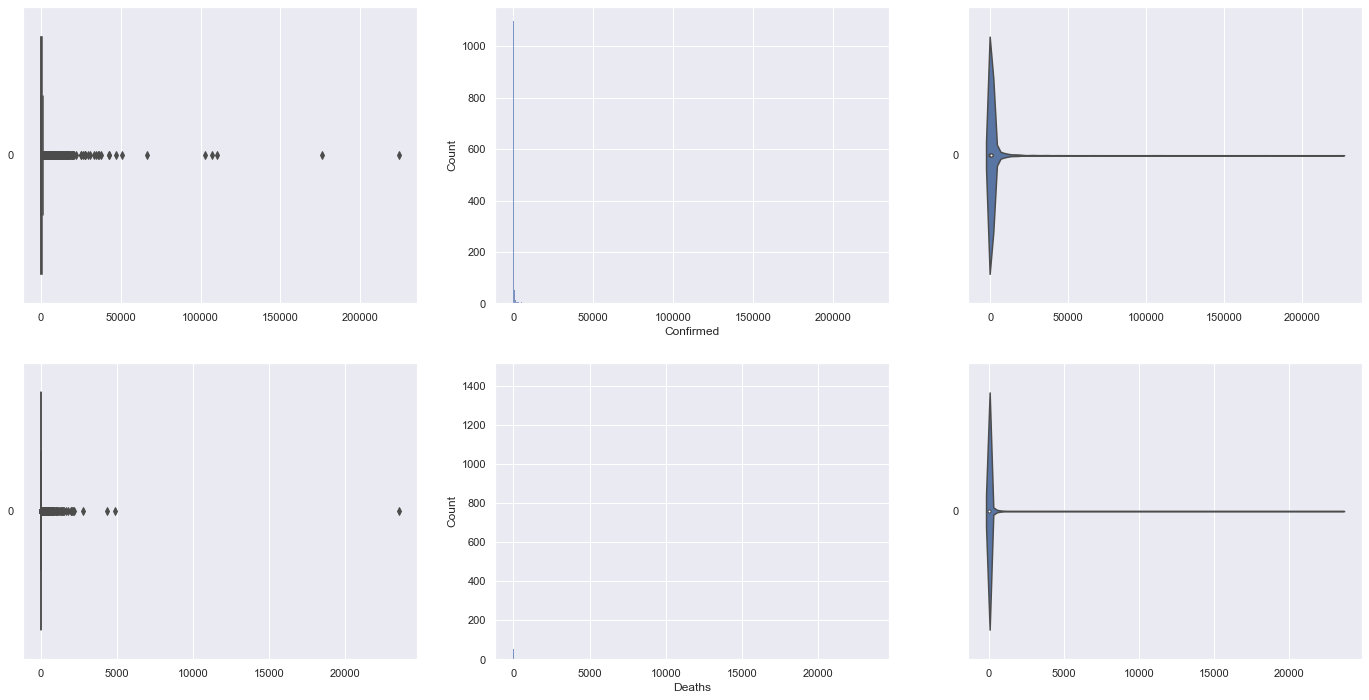

In [22]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = healdata['Confirmed'], orient = "h", ax = axes[0,0])
sb.histplot(data = healdata['Confirmed'], ax = axes[0,1])
sb.violinplot(data = healdata['Confirmed'], orient = "h", ax = axes[0,2])

sb.boxplot(data = healdata['Deaths'], orient = "h", ax = axes[1,0])
sb.histplot(data = healdata['Deaths'], ax = axes[1,1])
sb.violinplot(data = healdata['Deaths'], orient = "h", ax = axes[1,2])

From the above results we can see that it is very weird and there is no results that we can infer from the results above mostly due to the amount of outliers that is present in the dataset. Therefore, we have to remove the outliers.

In [23]:
#Removing Outliers
Q1c = healdata['Confirmed'].quantile(0.25)
Q3c = healdata['Confirmed'].quantile(0.75)
IQRc = Q3c - Q1c
healdata_wooutliers = pd.DataFrame(healdata[((healdata['Confirmed'] > (Q1c - 1.5 * IQRc)) & (healdata['Confirmed'] < (Q3c + 1.5 * IQRc)))])

In [24]:
#Removing Outliers
Q1d = healdata['Deaths'].quantile(0.25)
Q3d = healdata['Deaths'].quantile(0.75)
IQRd = Q3d - Q1d
healdata_wooutliers = pd.DataFrame(healdata_wooutliers[((healdata_wooutliers['Deaths'] > (Q1d - 1.5 * IQRd)) & (healdata_wooutliers['Deaths'] < (Q3d + 1.5 * IQRd)))])

We will remove the outliers for our datapoints too.

In [25]:
#Removing Outliers
Q1d = healdata['Total population without healthcare access'].quantile(0.25)
Q3d = healdata['Total population without healthcare access'].quantile(0.75)
IQRd = Q3d - Q1d
healdata_wooutliers = pd.DataFrame(healdata_wooutliers[((healdata_wooutliers['Total population without healthcare access'] < (Q3d + 1.5 * IQRd)))])

In [26]:
#Removing Outliers
Q1d = healdata['Civilian noninstitutionalized population with Health Coverage'].quantile(0.25)
Q3d = healdata['Civilian noninstitutionalized population with Health Coverage'].quantile(0.75)
IQRd = Q3d - Q1d
healdata_wooutliers = pd.DataFrame(healdata_wooutliers[((healdata_wooutliers['Civilian noninstitutionalized population with Health Coverage'] < (Q3d + 1.5 * IQRd)))])

Now that we have removed the outliers from the dataset, we can now plot the box and whiskers plot, histogram and violin plot of the dataset without outliers. 

<AxesSubplot:>

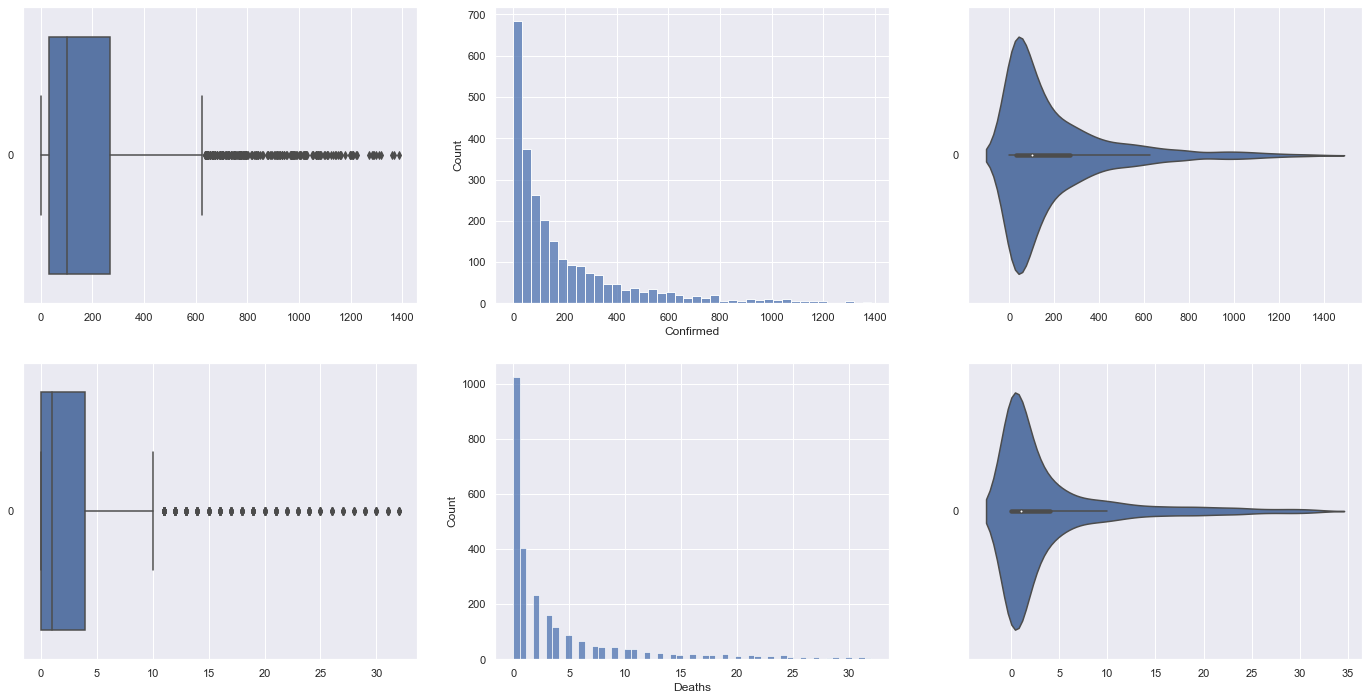

In [27]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = healdata_wooutliers['Confirmed'], orient = "h", ax = axes[0,0])
sb.histplot(data = healdata_wooutliers['Confirmed'], ax = axes[0,1])
sb.violinplot(data = healdata_wooutliers['Confirmed'], orient = "h", ax = axes[0,2])

sb.boxplot(data = healdata_wooutliers['Deaths'], orient = "h", ax = axes[1,0])
sb.histplot(data = healdata_wooutliers['Deaths'], ax = axes[1,1])
sb.violinplot(data = healdata_wooutliers['Deaths'], orient = "h", ax = axes[1,2])

Now this looks much better, although the shapes are still weird, but it is normal because the some of the counties are relatively very small compared to the other counties.

We will now plot a joint plot of the data points versus the confirmed cases and deaths cases, more specifically Confirmed cases and Death cases versus Total population without healthcare access as well as Confirmed cases and Death cases versus Civilian noninstitutionalized population with Health Coverage. However, we will start plotting using the datasets with outliers then the datasets without the outliers to better show the difference in correlation later on.


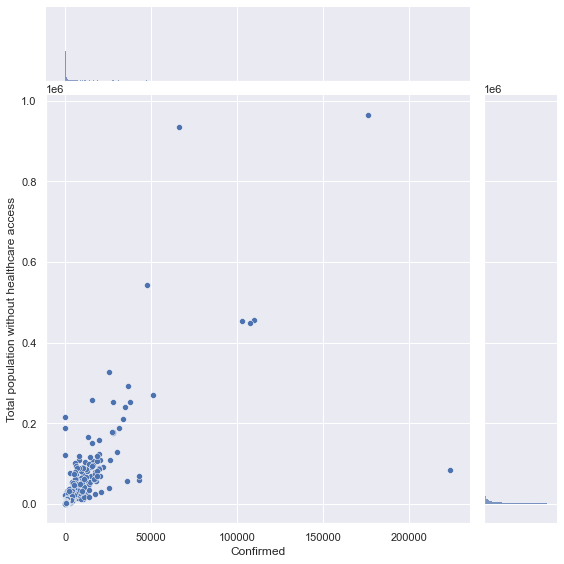

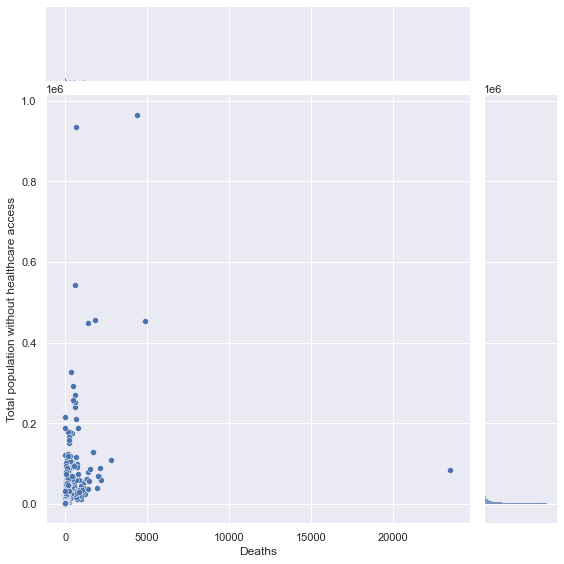

In [29]:
sb.jointplot(data = healdata, x = "Confirmed", y = "Total population without healthcare access", height = 8)
sb.jointplot(data = healdata, x = "Deaths", y = "Total population without healthcare access", height = 8)


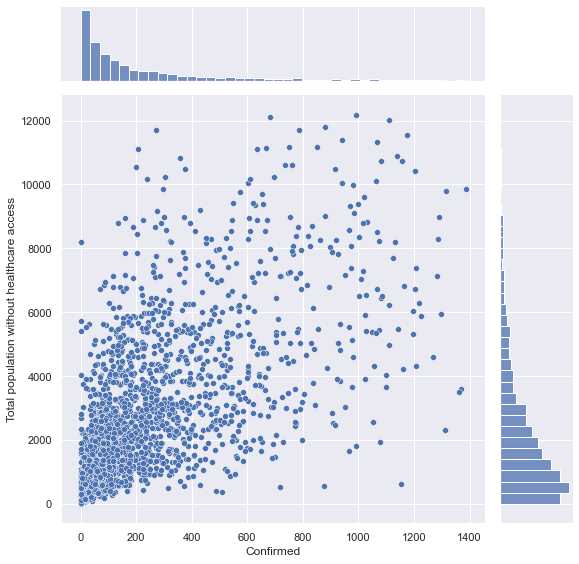

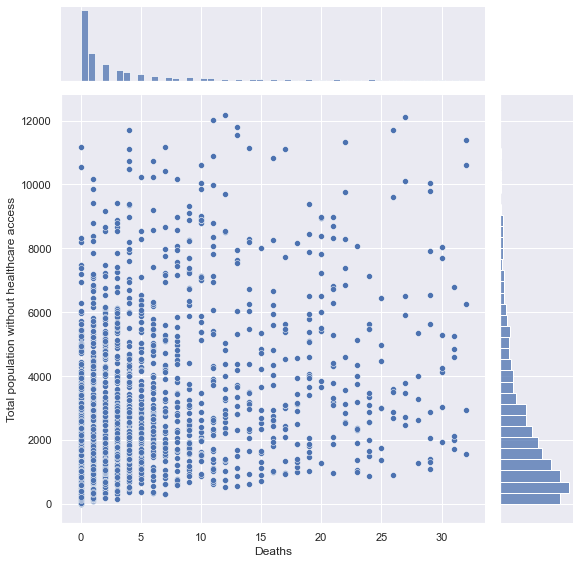

In [31]:
sb.jointplot(data = healdata_wooutliers, x = "Confirmed", y = "Total population without healthcare access", height = 8)
sb.jointplot(data = healdata_wooutliers, x = "Deaths", y = "Total population without healthcare access", height = 8)

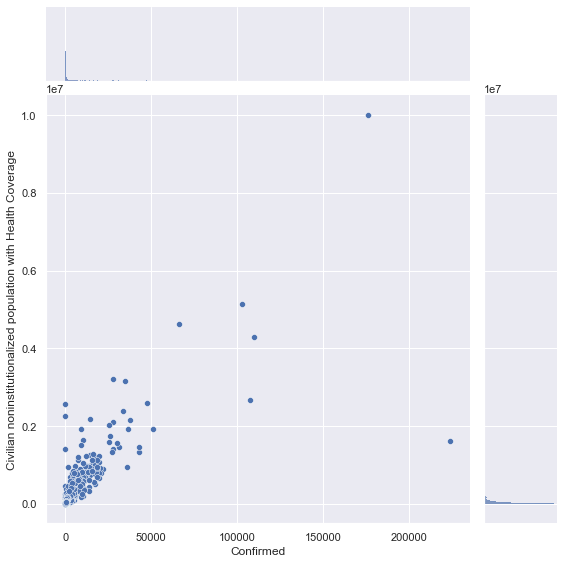

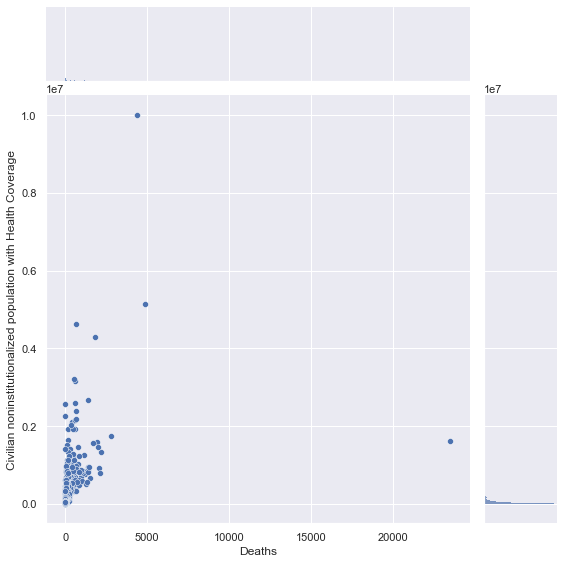

In [32]:
sb.jointplot(data = healdata, x = "Confirmed", y = "Civilian noninstitutionalized population with Health Coverage", height = 8)
sb.jointplot(data = healdata, x = "Deaths", y = "Civilian noninstitutionalized population with Health Coverage", height = 8)

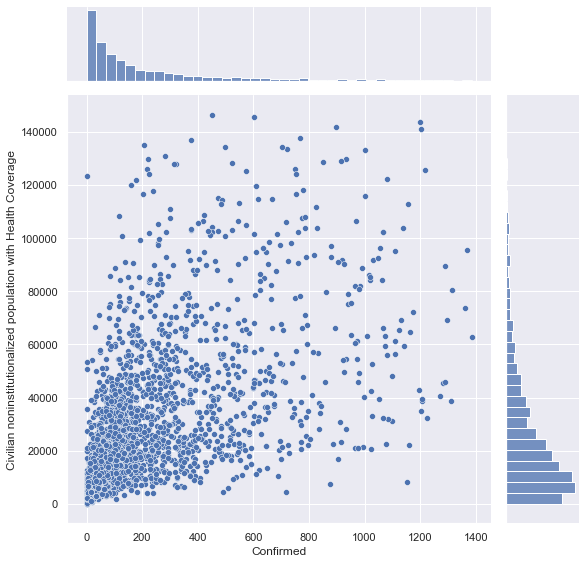

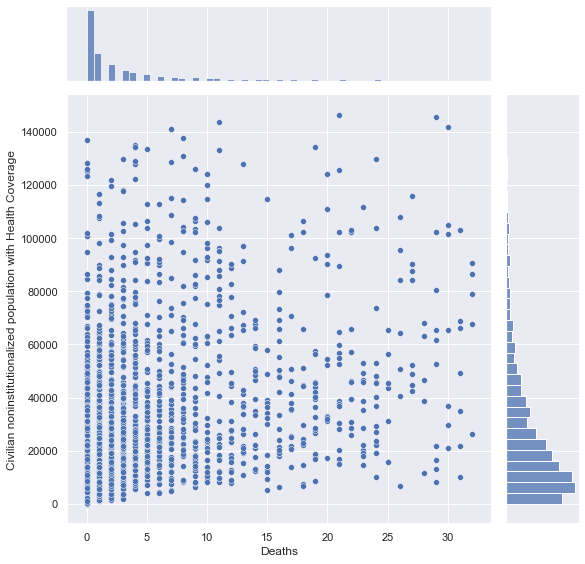

In [33]:
sb.jointplot(data = healdata_wooutliers, x = "Confirmed", y = "Civilian noninstitutionalized population with Health Coverage", height = 8)
sb.jointplot(data = healdata_wooutliers, x = "Deaths", y = "Civilian noninstitutionalized population with Health Coverage", height = 8)

As we can see, the difference with and without outliers is really huge, at least we can observe some pattern in the joint plot without outliers. We will now move on to the most important part, which is to calculate the correlation between the datapoints.

In [34]:
healdata1 = healdata[['Deaths', 'Confirmed', 'Total population without healthcare access','Civilian noninstitutionalized population with Health Coverage']]
healdata1.corr()

,Deaths,Confirmed,Total population without healthcare access,Civilian noninstitutionalized population with Health Coverage
Deaths,1.000000,0.794622,0.292921,0.390453
Confirmed,0.794622,1.000000,0.749709,0.793848
Total population without healthcare access,0.292921,0.749709,1.000000,0.913921
Civilian noninstitutionalized population with Health Coverage,0.390453,0.793848,0.913921,1.000000


In [35]:
healdata1_wooutliers = healdata_wooutliers[['Deaths', 'Confirmed', 'Total population without healthcare access','Civilian noninstitutionalized population with Health Coverage']]
healdata1_wooutliers.corr()

,Deaths,Confirmed,Total population without healthcare access,Civilian noninstitutionalized population with Health Coverage
Deaths,1.000000,0.646283,0.423587,0.397956
Confirmed,0.646283,1.000000,0.674904,0.593834
Total population without healthcare access,0.423587,0.674904,1.000000,0.815011
Civilian noninstitutionalized population with Health Coverage,0.397956,0.593834,0.815011,1.000000
